# 1) Basic User Input

This section imports the required packages and contains user input which shuld be reviewed every time the pipeline is used. 

In [1]:
import os
import pandas as pd
import sys
%matplotlib inline

Usually, this filepath must be adusted only once to specify where the .py file with all functions is stored.

In [2]:
# load custom functions
sys.path.insert(0, '/Users/timnoahkempchen/Desktop/SAP/Functions_grouped')


from  Helper_functions import *
from  Baseline_visualization import *
from  Neighborhood_Community_analysis import *
from  Analysis_dependent_on_CNs import *
from  All_functions import *

## 1.1) Filepaths 

Specify where the input dataframe (df) is stored as well as a path to store all output. 

The input data frame has to fullfill some minimal requirements: 
Data must be stored as pandas df (every row represents a cell)
1. The df must contain a __Sample ID__ for every cell
2. The df must contain one column each for __x__ and __y__ coordinates 
3. The df must contain one column specifying the __Cell Type__
4. The df must contain one column indicating the __Unique Region__ in which the cell was recorded 
5. The df should contain one column with an experimental condition or other type of __comparison__ 

In [3]:
input_file = "/Users/timnoahkempchen/Desktop/SAP/Data/Sample_data/subsetted_sample_data.csv"

output_dir = "/Users/timnoahkempchen/Downloads/Output_testnew/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## 1.2) Reading the data

In [4]:
df = pd.read_csv(input_file)

## 1.3) Specify column names 

In [5]:
sample_column = "sample" # Column specifies the analyzed samples. This could be an Identifier or a Case ID, etc. 
cell_type_column = "Cell Type" # Column specifies the respective cell type. This might be replaced with a broader cell types based on the specific analysis 
region_column = "unique_region" # This column should contain unique IDs for the respective regions 
X = "x" # Column containing coordinates on x axis 
Y = "y" # Column containing coordinates on y axis 
treatment_column ="consensus diagnosis" # Column containing comparisson, usally some kind of treatment/condition

# 2) Basic Visualization & Analysis 

## 2.1) Specify additional information

In [6]:
# Stacked bar plot
per_cat = "Major Cell Cat" 
grouping = 'consensus diagnosis'

norm=True
save_name= 'Major_subConsensus'

sub_col= 'Cell Type'
name_cat = 'Cell Type'
fig_sizing=(8,4)

pal_color=None
remove_leg=False


# Swarm plot 
sub_list = ['CD4+ Treg', "B"]
replicate_column = "unique_region"

cell_list = df["Major Cell Cat"].unique()

# correlation analysis 
sub_l = ['Immune','Epithelial','Mesenchymal']
save = True
## Set specific colors for figure 
coloring = None
## Specify order for x axis 
ordering = None 
## change figure size 
fig_size=8

## 2.2) Generate visualizations

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:80: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


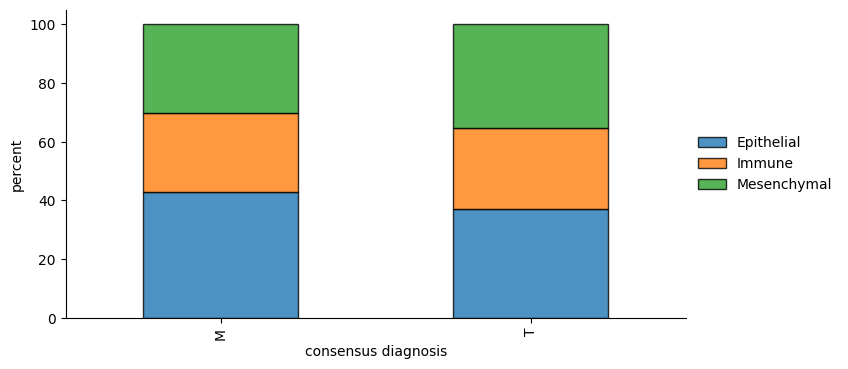

In [7]:
####### Stacked Bar Plot
# Shows percentage of category per group. For example: major cell types per diagnosis 
ab = stacked_bar_plot(data = df, \
                      per_cat = per_cat, \
                      grouping = grouping, \
                      output_dir = output_dir, \
                      sub_col= None, \
                      cell_list = cell_list,\
                      norm=False, \
                      fig_sizing=fig_sizing, \
                      name_cat = per_cat, \
                      col_order=None, \
                      save_name= "stacked_bar", \
                      pal_color=pal_color) 

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:168: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


<Figure size 200x300 with 0 Axes>

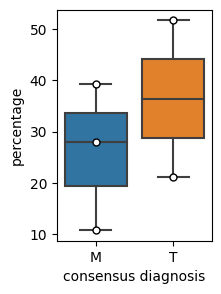

In [8]:
####### Swarm Boxplot 
total_neigh_st = swarm_box(data=df, \
                           grouping=grouping, \
                           replicate = replicate_column, \
                           sub_col=sub_col, \
                           sub_list=sub_list, \
                           output_dir = output_dir, \
                           norm=False, \
                           per_cat= per_cat, \
                           figure_sizing=(2,3), \
                           save_name='swarm_box', \
                           pal_color=None, \
                           h_order=None, \
                           flip=True)

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:1080: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite


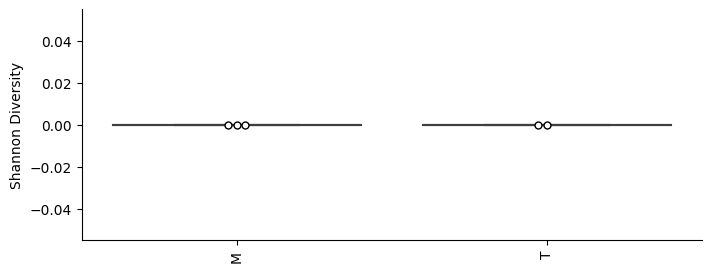

In [9]:
####### Swarm Boxplot of Shannon diversity score
result, pval, tukey_tab = Shan_div(data1=df, \
                                   sub_l = sub_l, \
                                   group_com = grouping, \
                                   per_categ = per_cat, \
                                   rep = replicate_column, \
                                   sub_column=sub_col, \
                                   normalize=True, \
                                   save=save, \
                                   coloring= coloring, \
                                   fig_size=fig_size, \
                                   ordering=None, \
                                   output_dir = output_dir)

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:619: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:552: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please upda

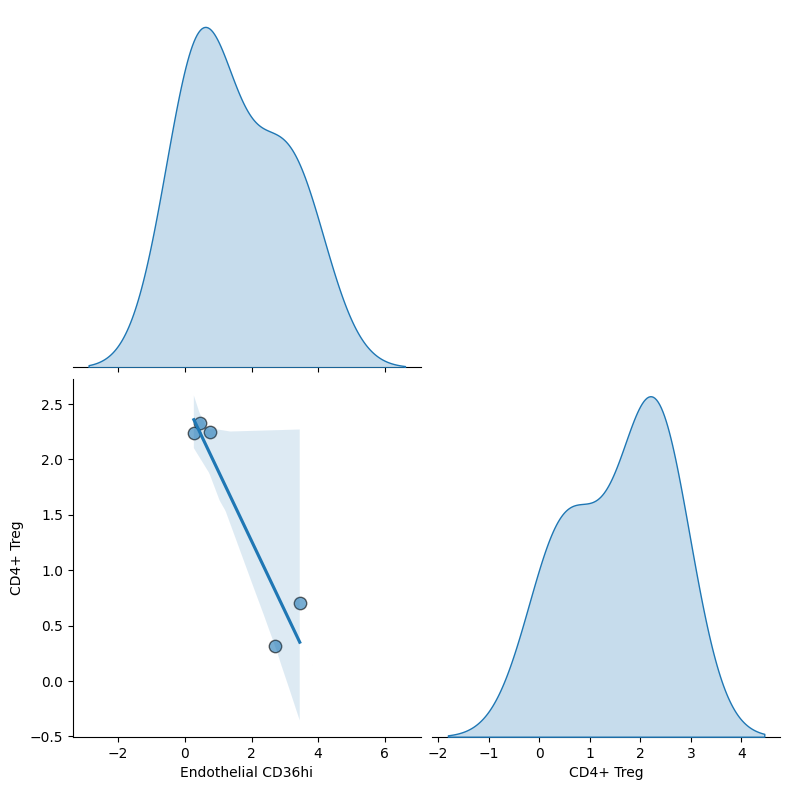

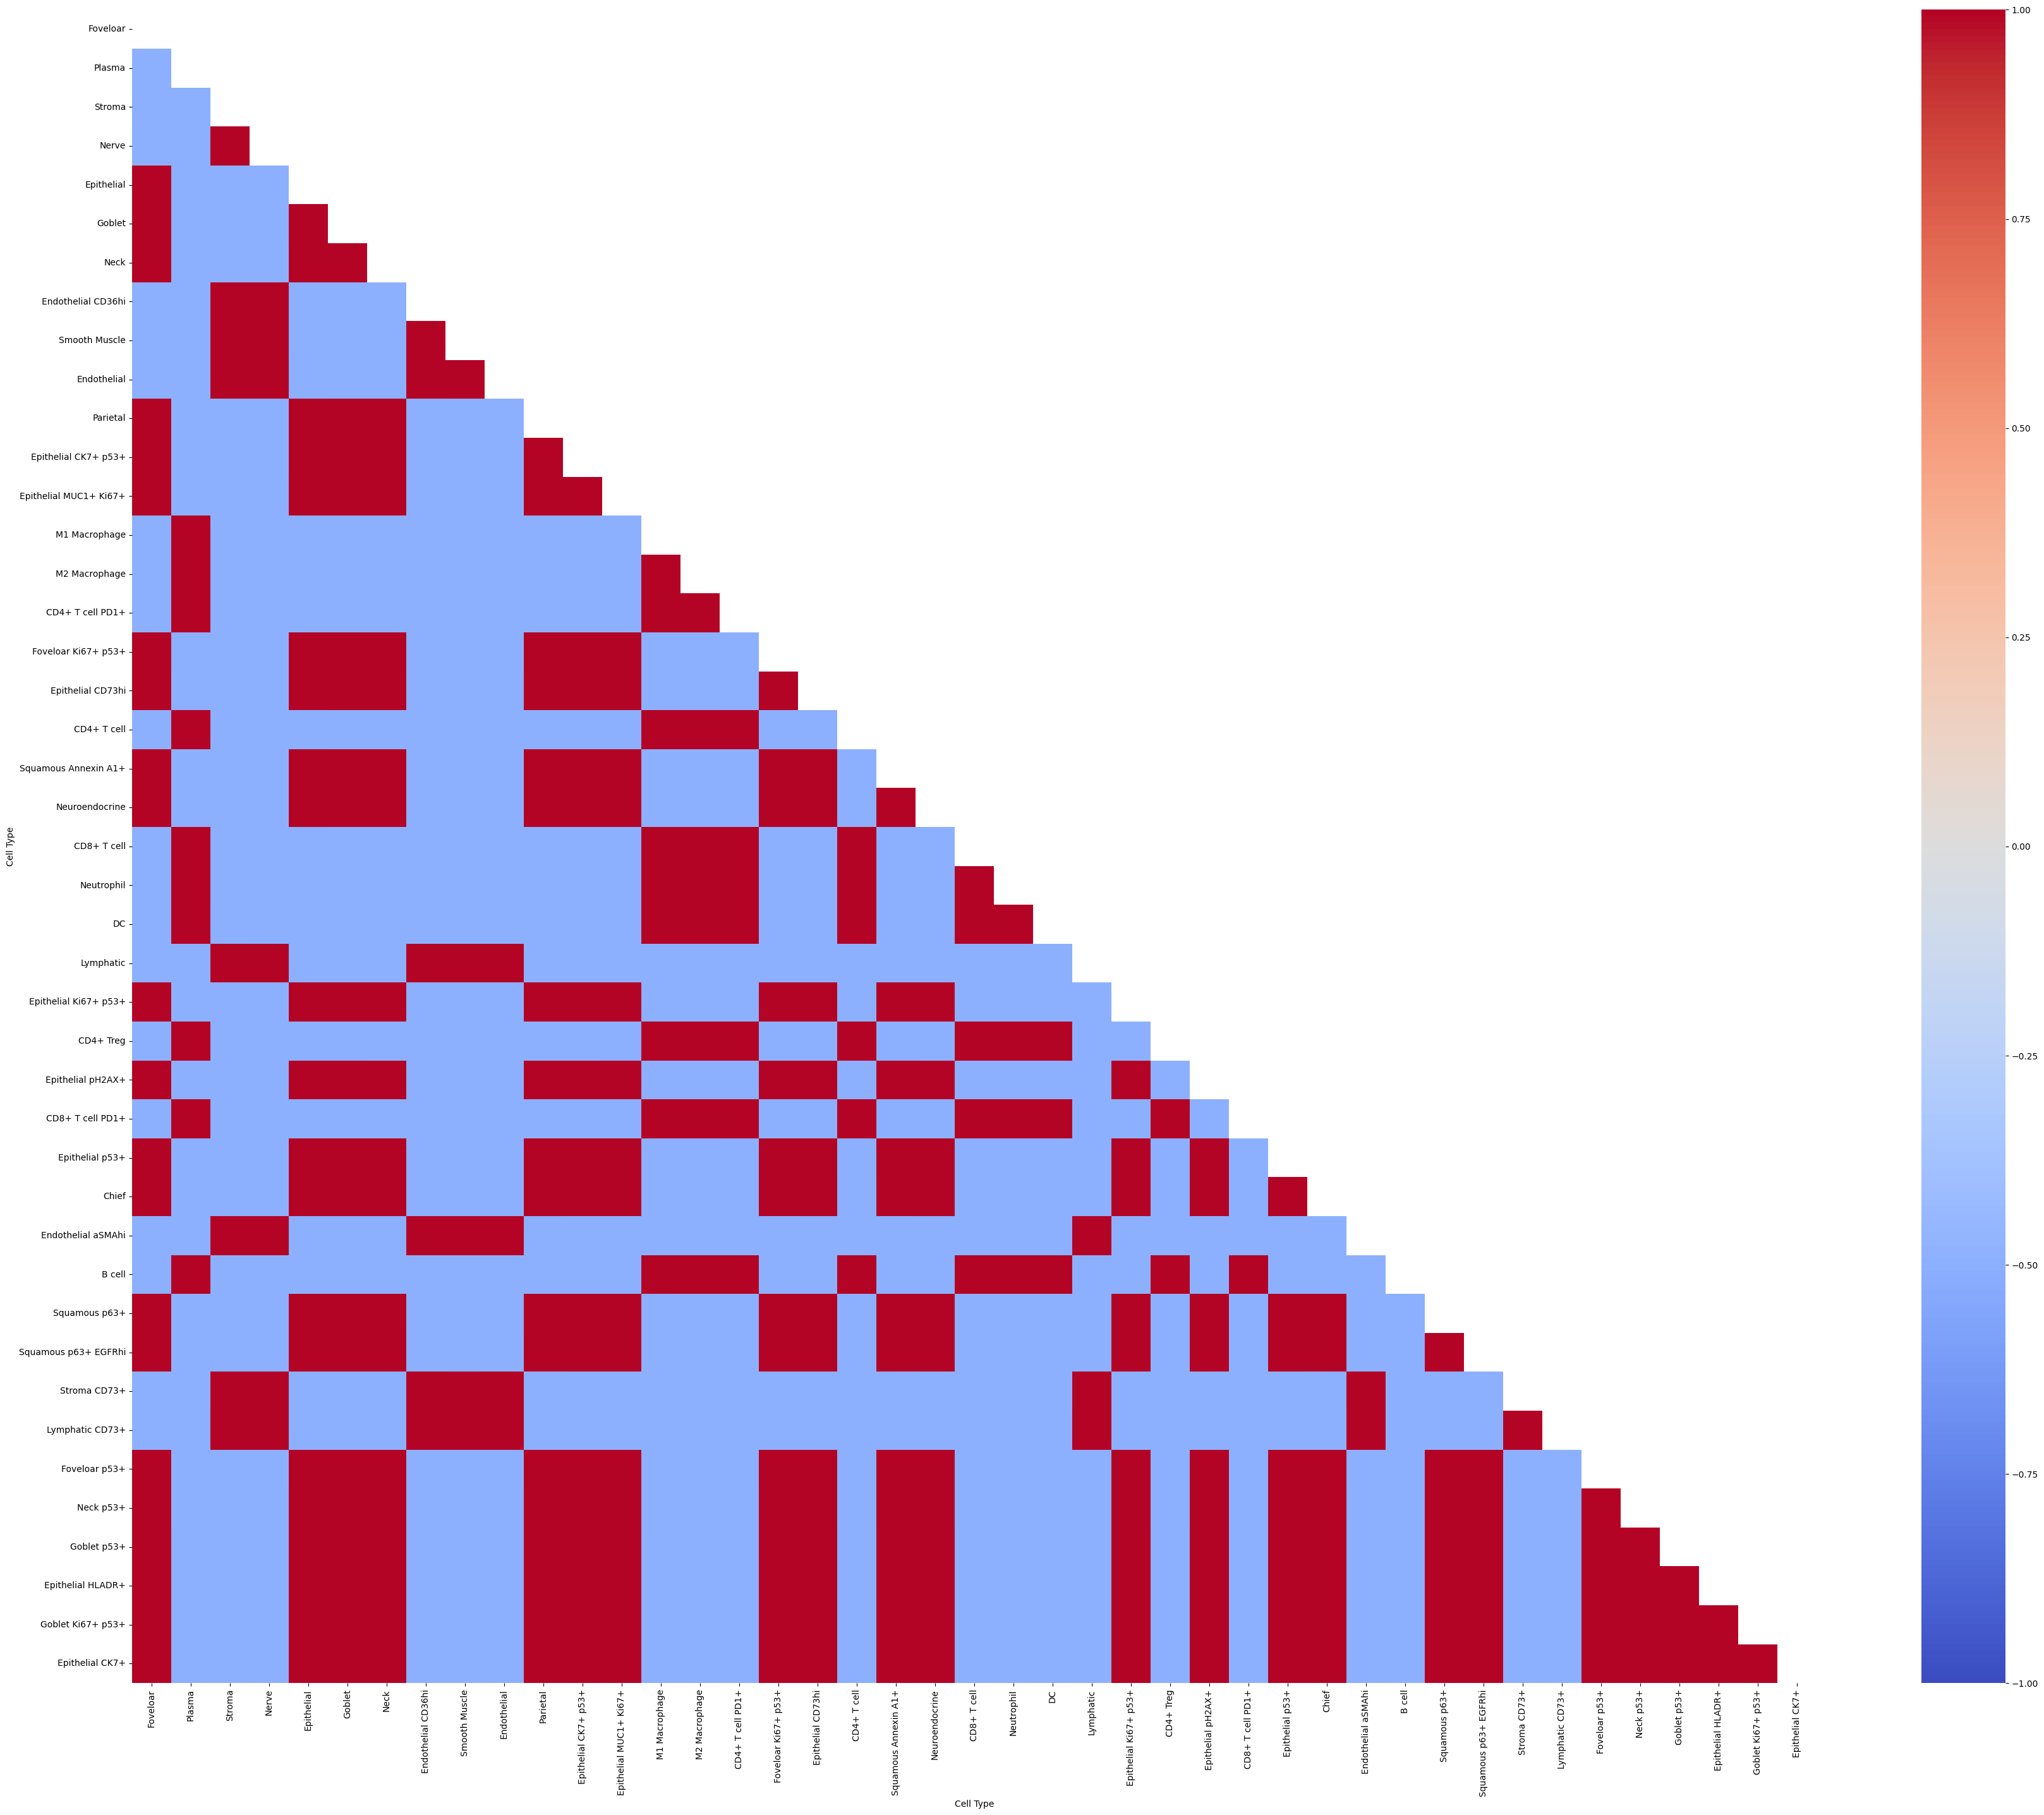

In [10]:
####### Correlation Analysis 

all_pair, sub_pari = corr_cell(data= df, \
                               sub_l2=sub_l, \
                               per_categ='Cell Type', \
                               group2='Sub diagnosis', \
                               repl='unique_region', \
                               sub_collumn= 'Major Cell Cat', \
                               cell='CD4+ Treg', \
                               normed=True, \
                               thres=0.7, \
                               cell2 = 'Endothelial CD36hi',
                               output_dir = output_dir, 
                               save_name = "cell1_cell2_cor")

cor_mat, mp = cor_plot(data = df, \
                       group1 = 'Major Cell Cat', \
                       per_cat = 'Cell Type', \
                       sub_col= 'Major Cell Cat', \
                       sub_list= sub_l, \
                       norm=True, \
                       count=False, \
                       plot_scatter=False)

cell_type = 'Epithelial CK7+'
piar1 = all_pair.loc[all_pair['col1']==cell_type]
piar2 = all_pair.loc[all_pair['col2']==cell_type]
piar=pd.concat([piar1,piar2])
piar

pair_list = list(set(list(piar['col1'].unique())+list(piar['col2'].unique())))
pair_list

sl = pair_list

cor_subplot(mp=mp, \
            sub_list=sl, \
            output_dir = output_dir)

# 3) Neighborhood and Community Analysis 

## 3.1) Specify additional column names 

In [11]:
####### Neighborhood analysis 
ks = [20, 30, 35] # k=n means it collects n nearest neighbors for each center cell
cluster_col = "Cell Type"
k = 35
n_neighborhoods = 30
k_centroids = {}

####### Community analysis 
ks_commun = [20] # k=n means it collects n nearest neighbors for each center cell
cluster_col_commun = "neighborhood35"
k_commun = 20
n_communities_commun = 30
k_centroids = {}

## 3.2) Neighborhood analysis 

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:336: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


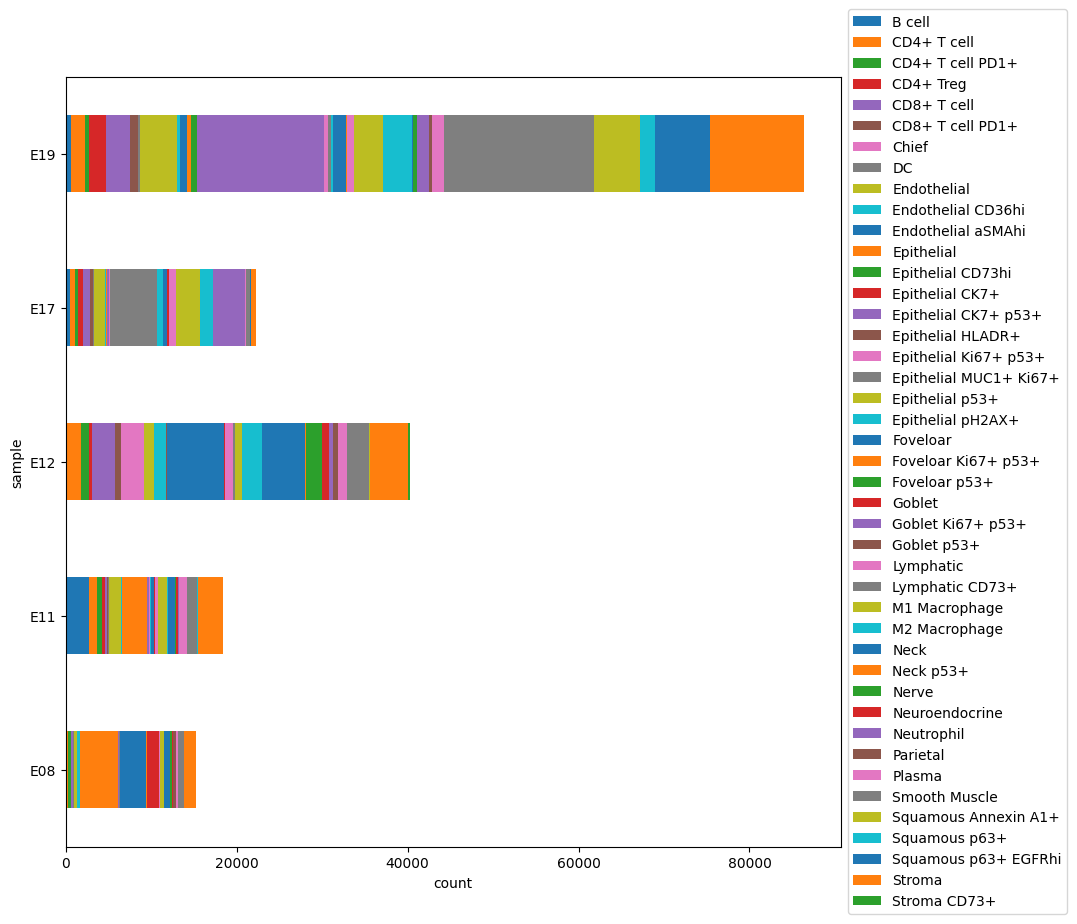

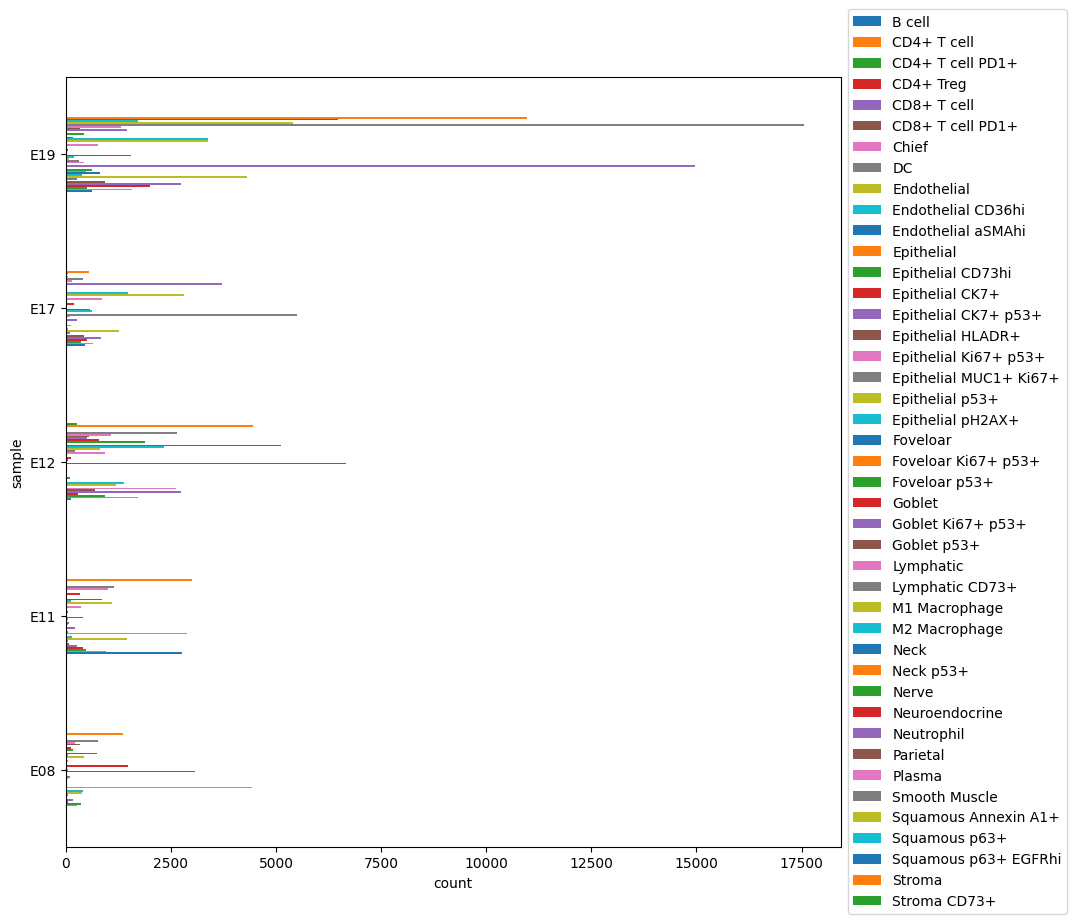

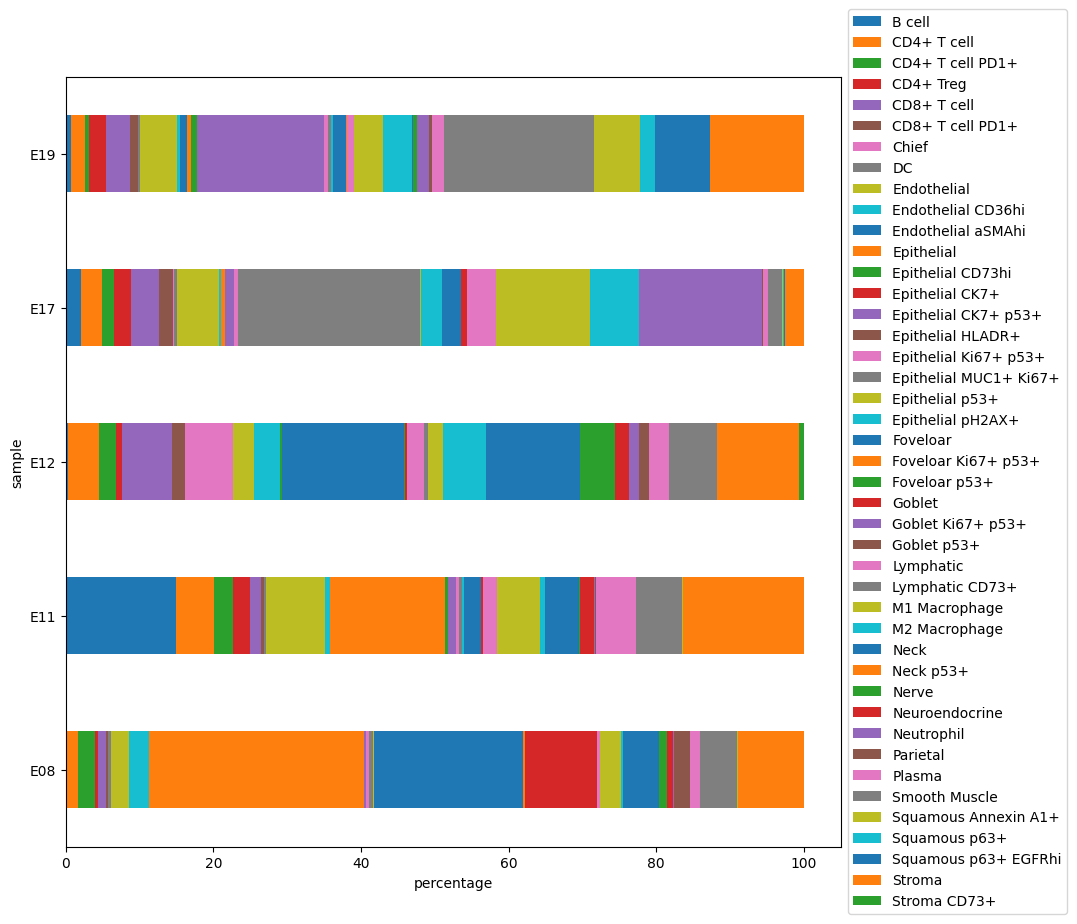

In [12]:
####### Visulize overall cell type composition
cell_type_composition_vis(df, \
                          sample_column = "sample", \
                          cell_type_column = "Cell Type", \
                          output_dir = output_dir)

/var/folders/6d/0x48qjh15rx9851lpdwvrxvc0000gn/T/ipykernel_16288/1415354720.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


Starting: 1/5 : E08_reg006
Finishing: 1/5 : E08_reg006 0.12616276741027832 0.12648797035217285
Starting: 2/5 : E11_reg002
Finishing: 2/5 : E11_reg002 0.12206315994262695 0.26300907135009766
Starting: 5/5 : E12_reg003
Finishing: 5/5 : E12_reg003 0.2769489288330078 0.54351806640625
Starting: 3/5 : E17_reg005
Finishing: 3/5 : E17_reg005 0.13719916343688965 0.6873431205749512
Starting: 4/5 : E19_reg003
Finishing: 4/5 : E19_reg003 0.6239171028137207 1.3160362243652344


/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:386: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:388: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:386: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:388: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:386: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahk

E08_reg006


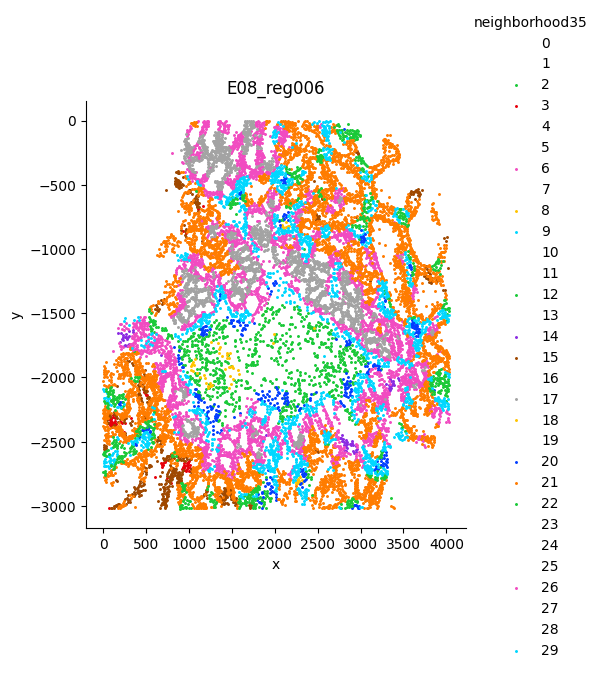

E11_reg002


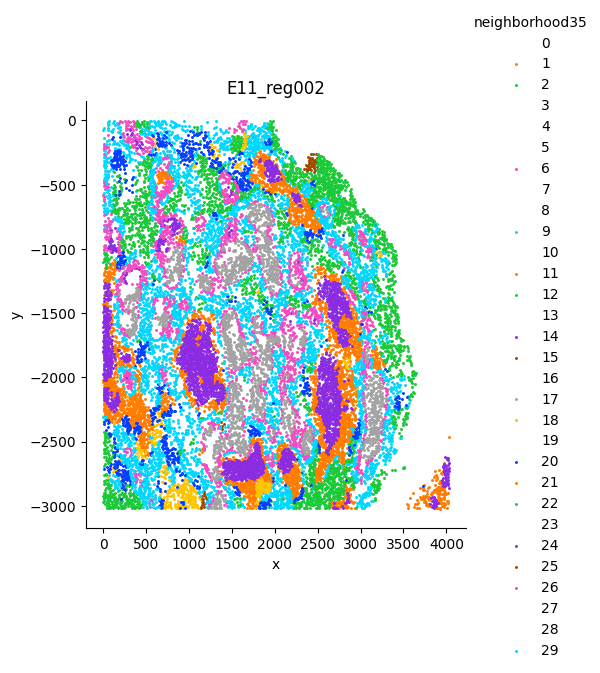

E17_reg005


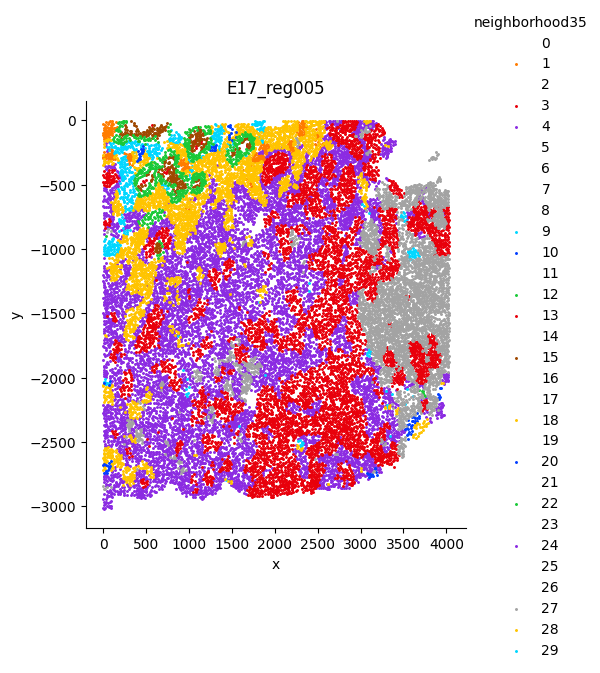

E19_reg003


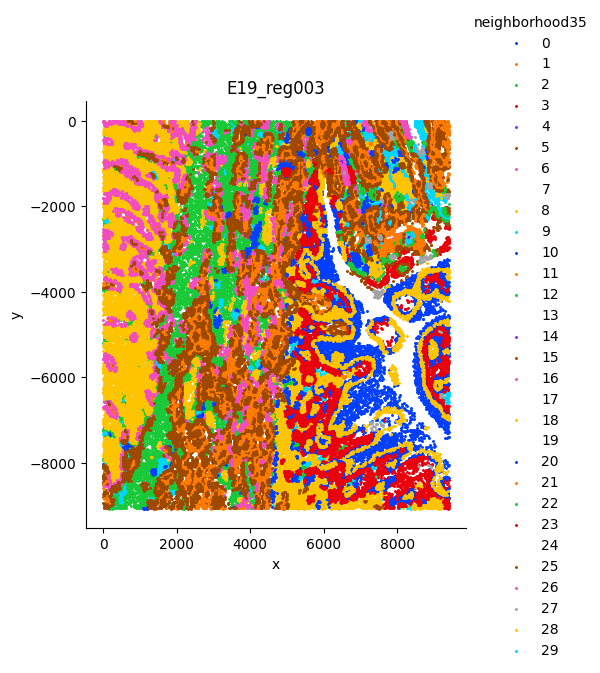

E12_reg003


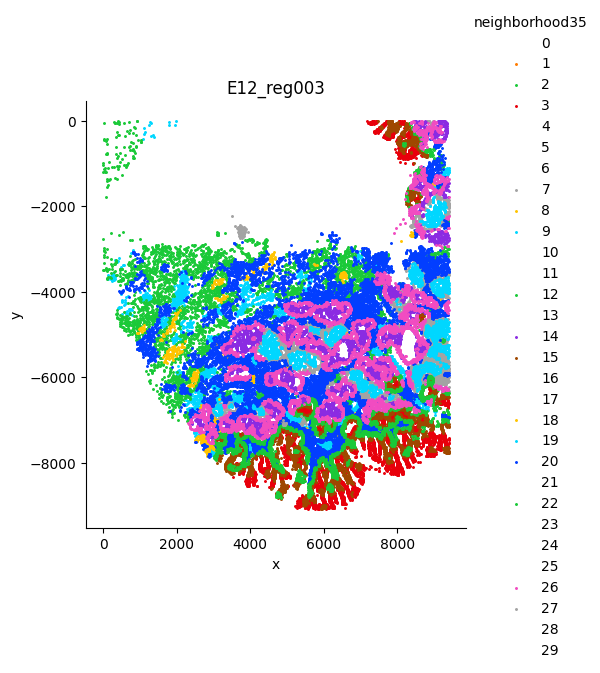

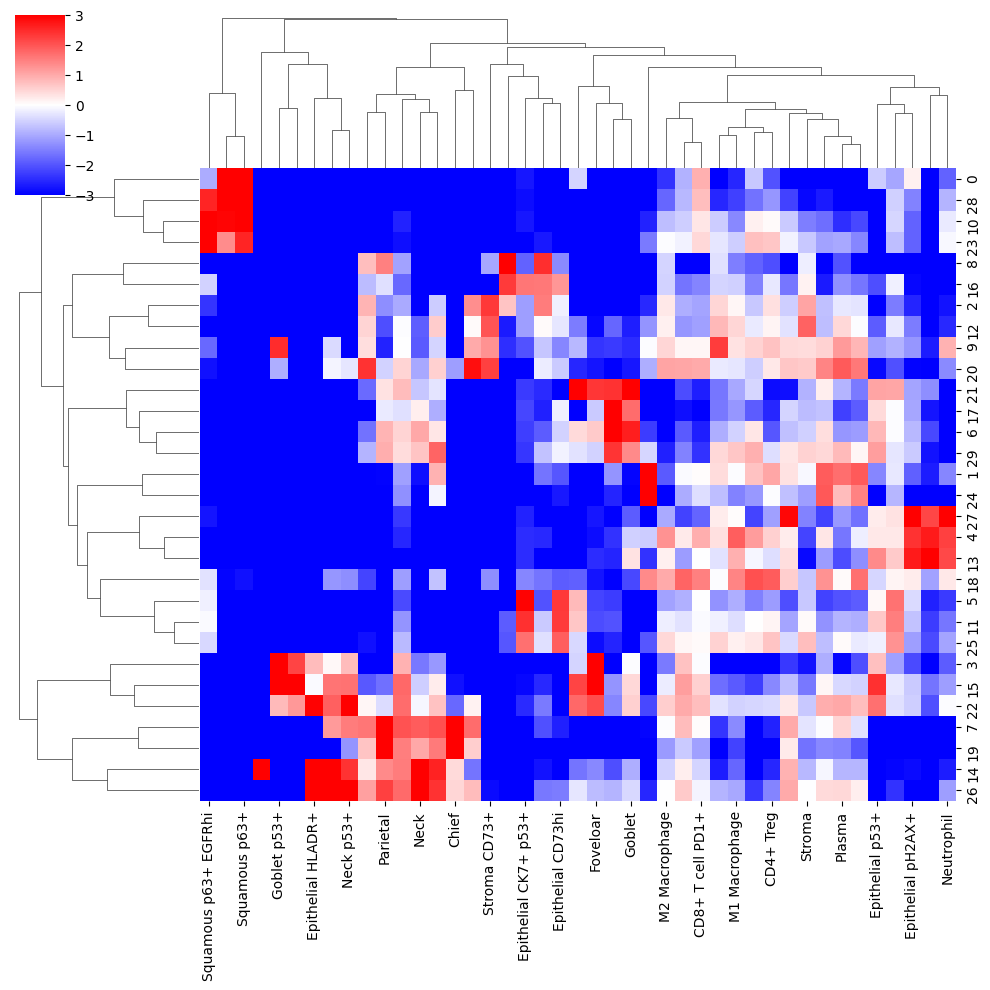

In [13]:
####### Neighborhood analysis 
df2 = pd.concat([df,pd.get_dummies(df[cluster_col])],1)
sum_cols = df2[cluster_col].unique()
values = df2[sum_cols].values

cells_df = neighborhood_analysis(df = df2, \
                                 X = X, \
                                 Y = Y, \
                                 reg = region_column, \
                                 cluster_col = cluster_col, \
                                 ks = ks, \
                                 output_dir = output_dir, \
                                 k = k, \
                                 n_neighborhoods = n_neighborhoods, \
                                 save_to_csv= True, \
                                 plot_specific_neighborhoods = [2,4], \
                                 values = values, \
                                 sum_cols = sum_cols)

## 3.3) Community Analysis 

Starting: 1/5 : E08_reg006
Finishing: 1/5 : E08_reg006 0.07037997245788574 0.07067608833312988
Starting: 2/5 : E11_reg002
Finishing: 2/5 : E11_reg002 0.0779571533203125 0.15421509742736816
Starting: 5/5 : E12_reg003
Finishing: 5/5 : E12_reg003 0.17767810821533203 0.3333251476287842
Starting: 3/5 : E17_reg005
Finishing: 3/5 : E17_reg005 0.08832573890686035 0.42527198791503906
Starting: 4/5 : E19_reg003
Finishing: 4/5 : E19_reg003 0.4008021354675293 0.8283419609069824


/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:862: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:864: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


E08_reg006


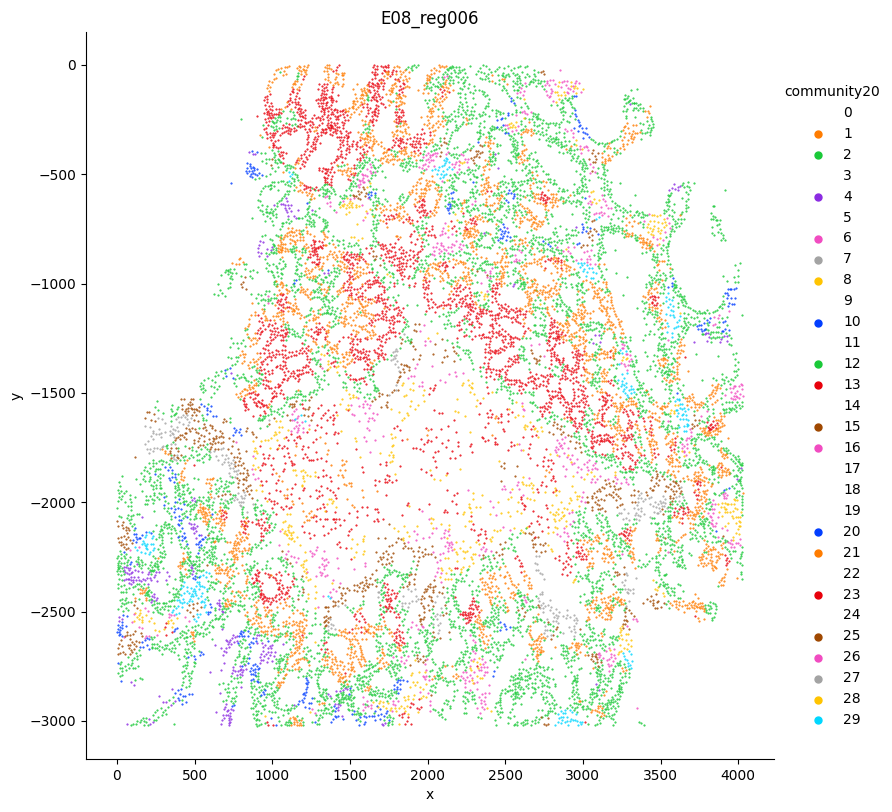

E11_reg002


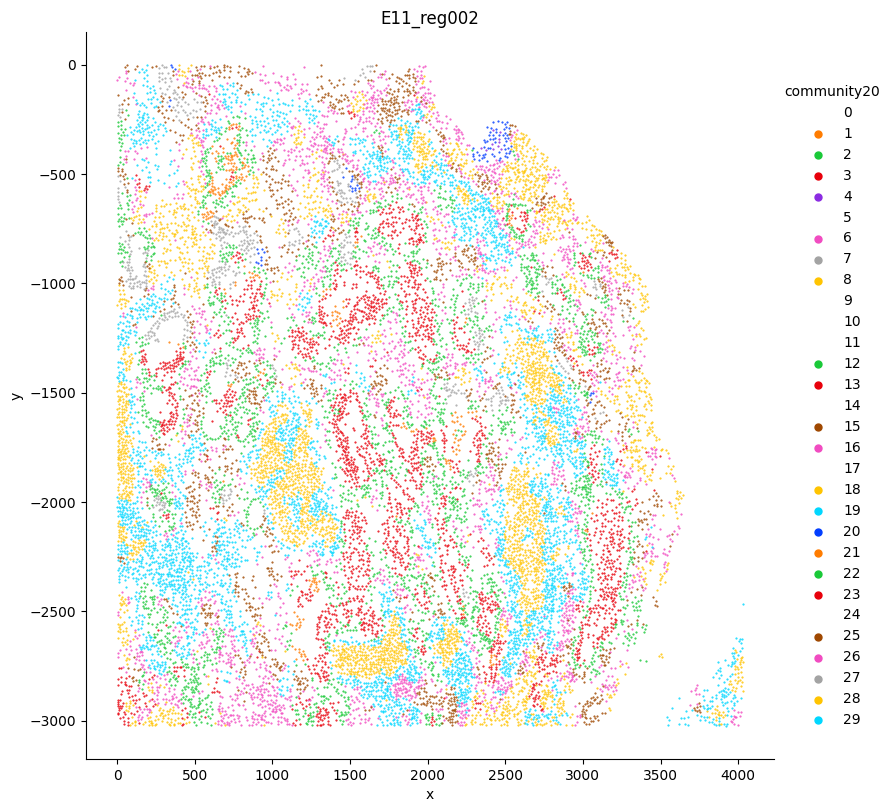

E17_reg005


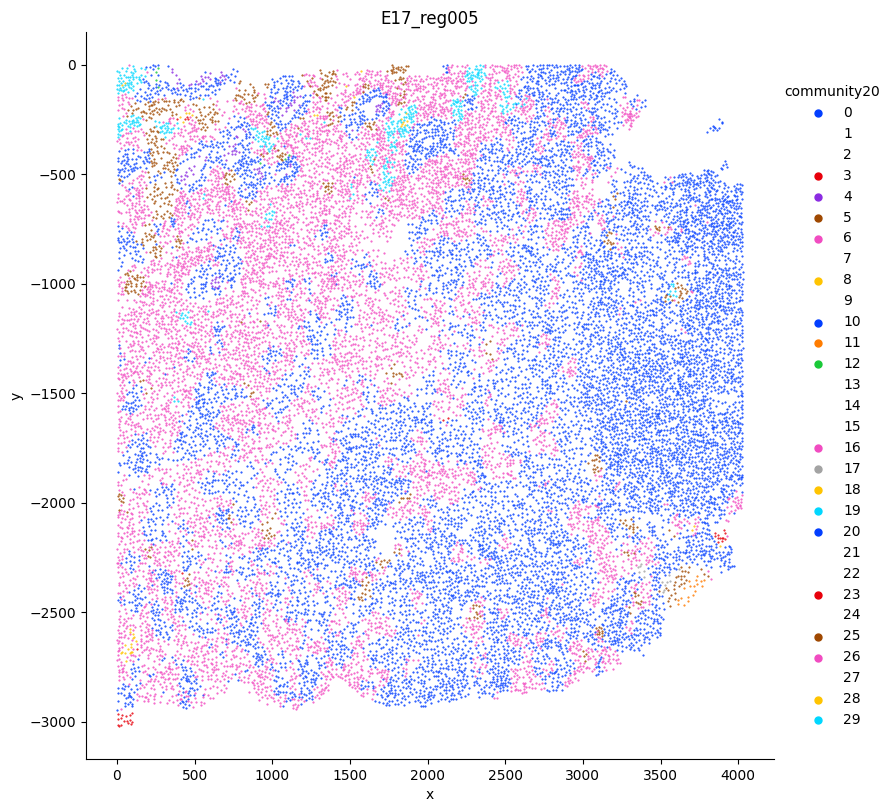

E19_reg003


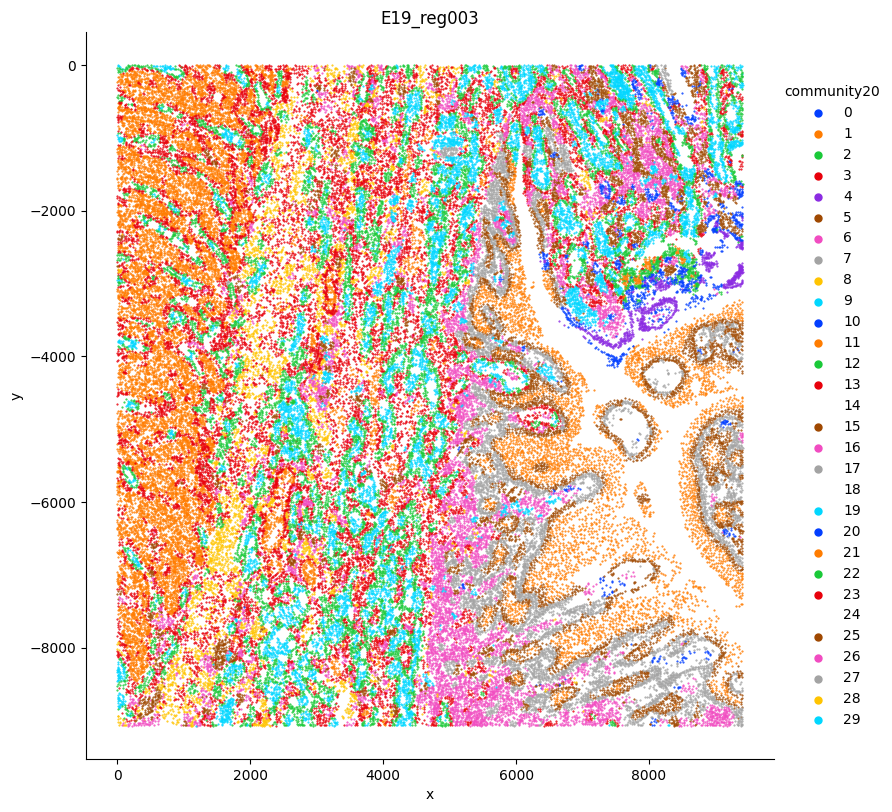

E12_reg003


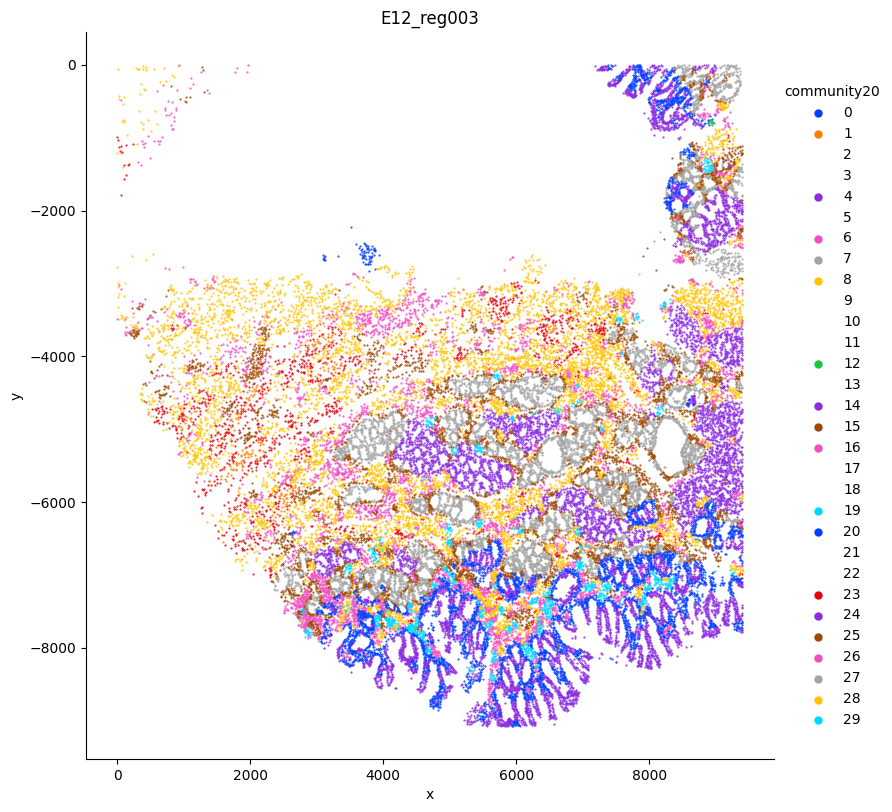

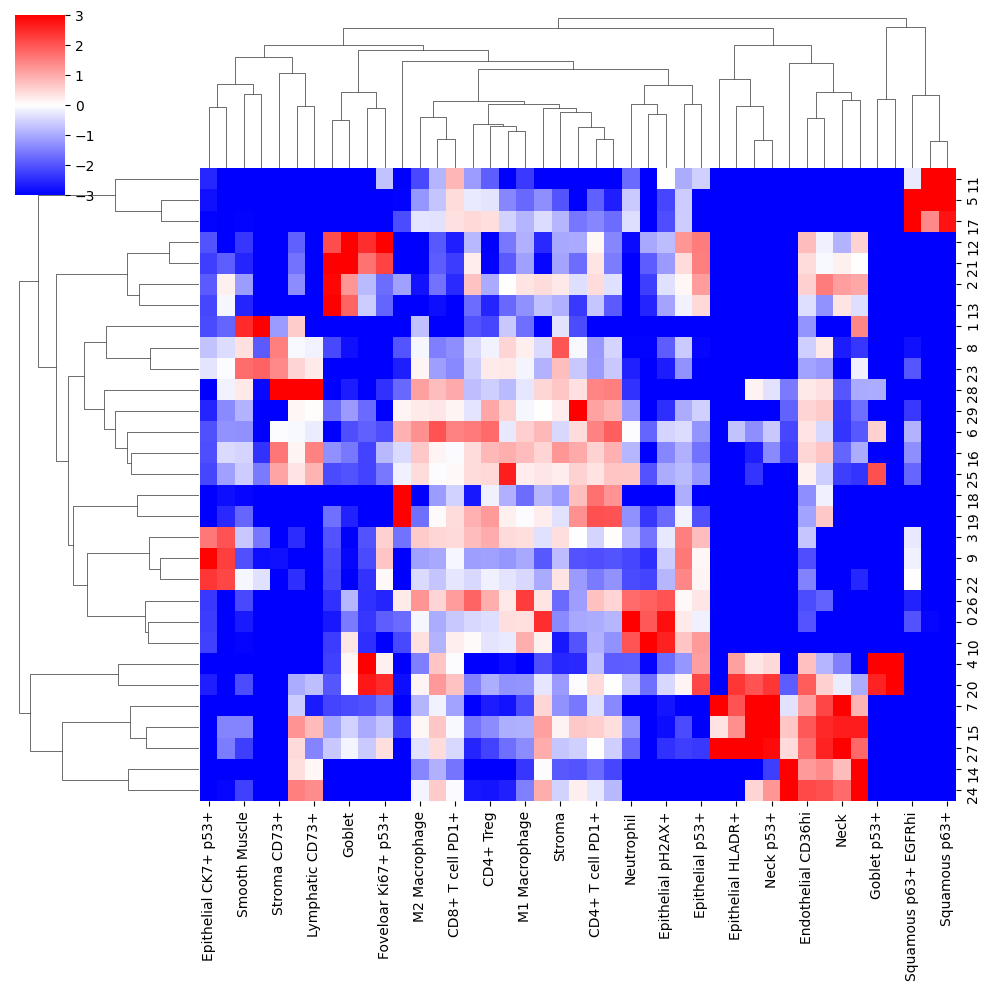

In [14]:
cells_df2 = community_analysis(df = cells_df, \
                               X = X, \
                               Y = Y, \
                               reg = region_column, \
                               cluster_col = cluster_col_commun, \
                               ks = ks_commun, \
                               output_dir = output_dir, \
                               k = k_commun, \
                               n_neighborhoods = n_communities_commun, \
                               plot_specific_community = [2,4,5], \
                               values = values, \
                               sum_cols = sum_cols)

# 4) Analysis dependent on neighborhood analysis 

## 4.1) Specify additional column names 

In [15]:
####### Cell Type Differential Enrichment 
ID_component1 = 'sample'
ID_component2 = 'Block type'
neighborhood_col = 'neigh_name'
group_col = 'Core Type'
group_dict = {'Dysplasia':0, 'Adenocarcinoma':1, "Barrett's Metaplasia":2, "Squamous":3}
cell_type_col = 'Cell Type'

neighborhood_col_number = 'neigh_num'

## 4.2) Cell Type Differential Enrichment 

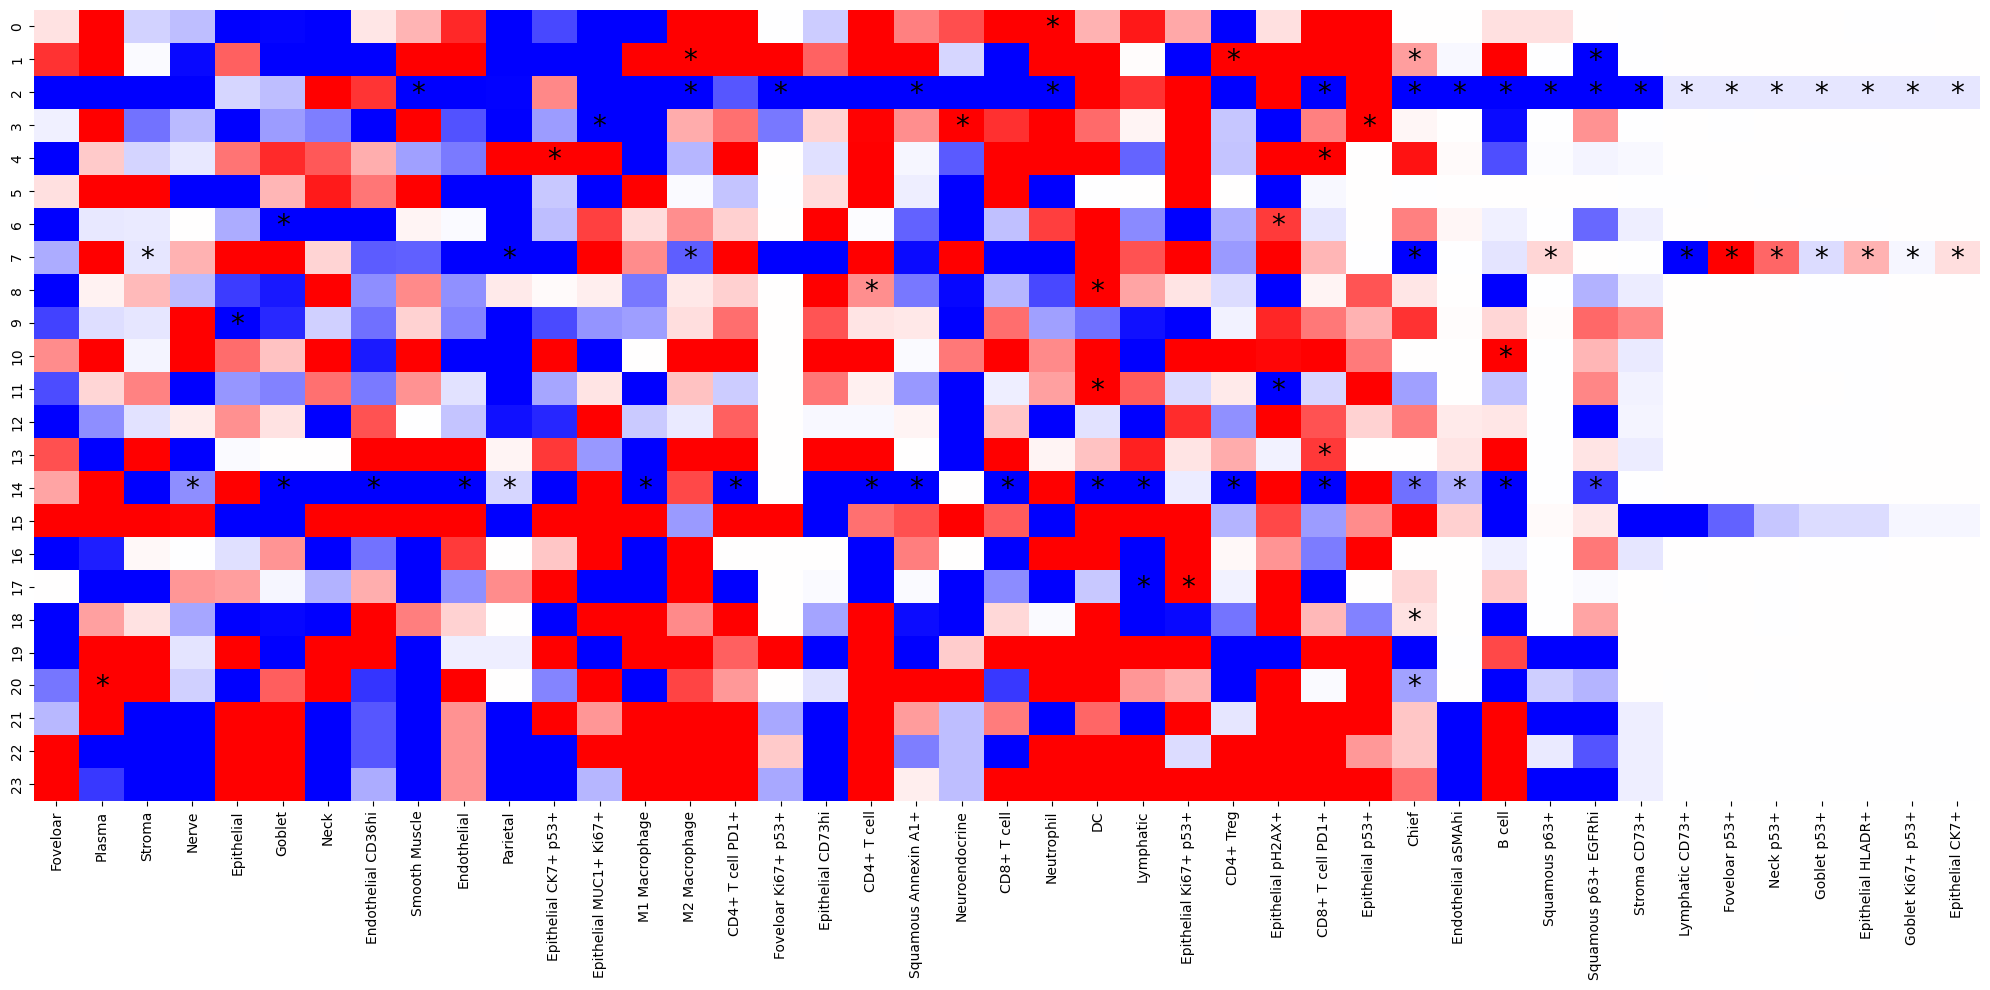

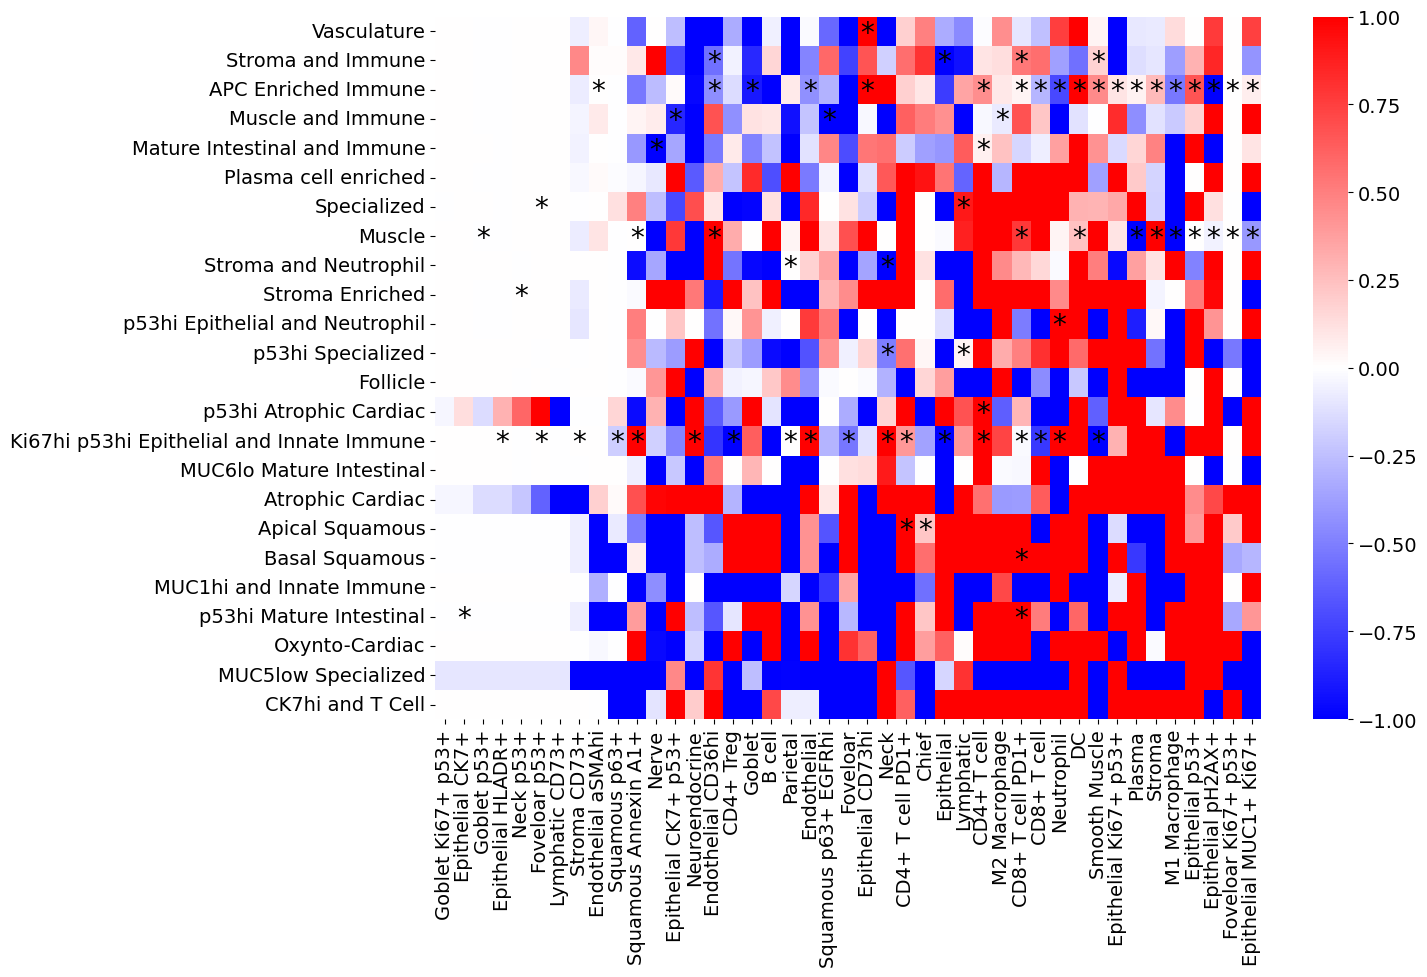

In [16]:
cells2, ct_freq, all_freqs, pat_to_gp, neigh_num = cell_types_de_helper(df = cells_df, \
                                                                        ID_component1 = ID_component1, \
                                                                        ID_component2 = ID_component2, \
                                                                        neighborhood_col = neighborhood_col, \
                                                                        group_col = group_col, \
                                                                        group_dict = group_dict, \
                                                                        cell_type_col = cell_type_col)

nbs = list(cells2[neighborhood_col_number].unique())
patients = list(cells2['patients'].unique()) 
group = pd.Series(pat_to_gp)
cells = list(cells2['Cell Type'].unique())
#cells = ['Tumor','CD4+ Treg']

cells1 = cells.copy()
cells1.append('patients')
cells1

cell_types_de(ct_freq = ct_freq, \
              all_freqs = all_freqs, \
              neighborhood_num = neighborhood_col_number, \
              nbs = nbs, \
              patients = patients, \
              group = group, \
              cells = cells, \
              cells1 = cells1, \
              neigh_num = neigh_num, \
              output_dir = output_dir)

## 4.3) Canonical Correlation Analysis (CCA) 

In [18]:

def Perform_CCA(cca, n_perms, nsctf, cns, subsets, group):
    stats_group1 = {}
    for cn_i in cns:
        for cn_j in cns:
            if cn_i < cn_j:
                print(cn_i, cn_j)
                #concat dfs
                combined = pd.concat([nsctf.loc[cn_i].loc[nsctf.loc[cn_i].index.isin(group)],nsctf.loc[cn_j].loc[nsctf.loc[cn_j].index.isin(group)]], axis = 1).dropna(axis = 0, how = 'any')
                if combined.shape[0]>2:
                    x = combined.iloc[:,:len(subsets)].values
                    y = combined.iloc[:,len(subsets):].values

                    arr = np.zeros(n_perms)

                    #compute the canonical correlation achieving components with respect to observed data
                    ccx,ccy = cca.fit_transform(x,y)
                    stats_group1[cn_i,cn_j] = (pearsonr(ccx[:,0],ccy[:,0])[0],arr)

                    #initialize array for perm values

                    for i in range(n_perms):
                        idx = np.arange(len(x))
                        np.random.shuffle(idx)
                        # compute with permuted data
                        cc_permx,cc_permy = cca.fit_transform(x[idx],y)
                        arr[i] = pearsonr(cc_permx[:,0],cc_permy[:,0])[0]
    return stats_group1 
    

In [60]:
def Visulize_CCA_results(CCA_results, save_path, save_fig = False, p_thresh = 0.1, save_name = "CCA_vis.png"):
    # Visualization of CCA 
    g1 = nx.petersen_graph()
    for cn_pair, cc in CCA_results.items():
        
        s,t = cn_pair
        obs, perms = cc
        p =np.mean(obs>perms)
        if p>p_thresh :
            g1.add_edge(s,t, weight = p)
 
    pal = sns.color_palette('bright',50)
    dash = {True: '-', False: ':'}
    pos=nx.nx_agraph.graphviz_layout(g1,prog='neato')
    for k,v in pos.items():
        x,y = v
        plt.scatter([x],[y],c = [pal[k]], s = 300,zorder = 3)
        #plt.text(x,y, k, fontsize = 10, zorder = 10,ha = 'center', va = 'center')
        plt.axis('off')
               

    atrs = nx.get_edge_attributes(g1, "weight")  
    for e0,e1 in g1.edges():
        if isinstance(g1.get_edge_data(e0, e1, default =0), int):
            p = g1.get_edge_data(e0, e1, default =0)
        else:
            p = g1.get_edge_data(0, 1, default =0)['weight']
        plt.plot([pos[e0][0],pos[e1][0]],[pos[e0][1],pos[e1][1]], c= 'black',alpha = 3*p**1,linewidth = 3*p**3)

    if save_fig == True:
        plt.savefig(save_path + "/" + save_name, format='png', dpi=300, transparent=True, bbox_inches='tight')
    
              

In [49]:
g1.get_edge_data(0, 1, default =0)['weight']

0.3238

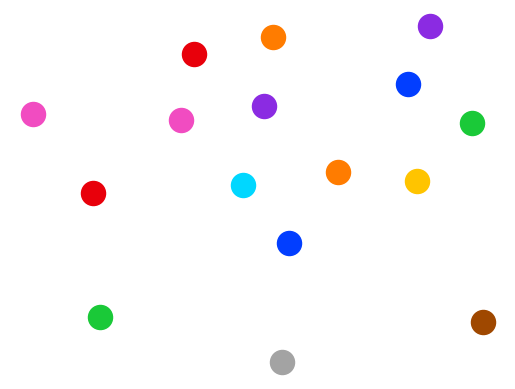

In [31]:
    # Visualization of CCA 
    g1 = nx.petersen_graph()
    for cn_pair, cc in CCA_results.items():
        
        s,t = cn_pair
        obs, perms = cc
        p =np.mean(obs>perms)
        if p>0.1 :
            g1.add_edge(s,t, weight = p)
 
    pal = sns.color_palette('bright',50)
    dash = {True: '-', False: ':'}
    pos=nx.nx_agraph.graphviz_layout(g1,prog='neato')
    for k,v in pos.items():
        x,y = v
        plt.scatter([x],[y],c = [pal[k]], s = 300,zorder = 3)
        #plt.text(x,y, k, fontsize = 10, zorder = 10,ha = 'center', va = 'center')
        plt.axis('off')
    atrs = nx.get_edge_attributes(g1, "weight")

In [35]:
tmp = atrs
atrs

{(0, 1): 0.3238,
 (0, 3): 0.336,
 (0, 6): 0.662,
 (0, 8): 0.3392,
 (0, 10): 0.3322,
 (0, 12): 0.3242,
 (0, 16): 0.3264,
 (1, 6): 0.1712,
 (1, 4): 0.6594,
 (1, 8): 0.8326,
 (1, 9): 0.334,
 (1, 10): 0.8226,
 (1, 11): 0.3332,
 (1, 12): 0.8368,
 (1, 13): 0.666,
 (1, 14): 0.6628,
 (3, 4): 0.336,
 (3, 6): 0.5006,
 (3, 9): 0.6658,
 (3, 11): 0.6672,
 (3, 13): 0.3296,
 (3, 16): 0.8344,
 (4, 9): 0.6694,
 (4, 8): 0.6664,
 (4, 10): 0.68,
 (4, 11): 0.6648,
 (4, 12): 0.4848,
 (4, 13): 0.8354,
 (4, 14): 0.6832,
 (4, 16): 0.1674,
 (6, 8): 0.1654,
 (6, 9): 0.3254,
 (6, 10): 0.1632,
 (6, 11): 0.34,
 (6, 12): 0.1646,
 (6, 16): 0.6672,
 (8, 9): 0.3326,
 (8, 10): 0.8348,
 (8, 11): 0.3326,
 (8, 12): 0.8312,
 (8, 13): 0.6664,
 (8, 14): 0.6708,
 (9, 10): 0.3306,
 (9, 11): 0.8354,
 (9, 12): 0.34,
 (9, 13): 0.6754,
 (9, 14): 0.343,
 (9, 16): 0.5104,
 (10, 11): 0.3342,
 (10, 12): 0.8292,
 (10, 13): 0.6658,
 (10, 14): 0.6584,
 (12, 11): 0.3302,
 (12, 13): 0.4994,
 (12, 14): 0.6794,
 (16, 11): 0.4998,
 (16, 13): 0

0.3238

In [40]:
if isinstance(g1.get_edge_data(0, 2, default =0), int):
    p = g1.get_edge_data(0, 2, default =0)
else:
    p = g1[0][1]["weight"]

In [ ]:
for e0,e1 in g1.edges():
        print(type(e0),type(e1))
        p = atrs[e0,e1]
        #p = g1.get_edge_data(e0, e1, default =0)
        print(p, type(p))


In [ ]:
type(p)

In [ ]:
    # Visualization of CCA 
    g1 = nx.petersen_graph()
    for cn_pair, cc in CCA_results.items():
        s,t = cn_pair
        obs, perms = cc
        p =np.mean(obs>perms)
        if p>0.9 :
            g1.add_edge(s,t, weight = p)
 
    pal = sns.color_palette('bright',50)
    dash = {True: '-', False: ':'}
    pos=nx.nx_agraph.graphviz_layout(g1,prog='neato')
    for k,v in pos.items():
        x,y = v
        plt.scatter([x],[y],c = [pal[k]], s = 300,zorder = 3)
        #plt.text(x,y, k, fontsize = 10, zorder = 10,ha = 'center', va = 'center')
        plt.axis('off')
    atrs = nx.get_edge_attributes(g1, 'weight')   


In [26]:
save_name = "CCA_vis.png"

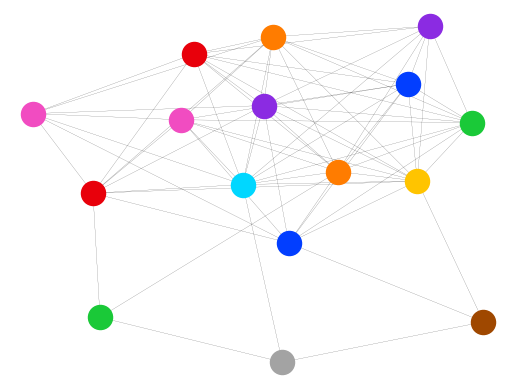

In [59]:
Visulize_CCA_results(CCA_results = stats_group1, save_fig = False, save_path = output_dir, save_name = "CCA_vis.png")


You assigned following identifiers to the column 'patients':
['E08_Biopsy' 'E11_Biopsy' 'E17_Biopsy' 'E19_Resection' 'E12_Resection']

['E08_Biopsy', 'E11_Biopsy', 'E17_Biopsy']
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
9 10
9 11
9

KeyError: 'weight'

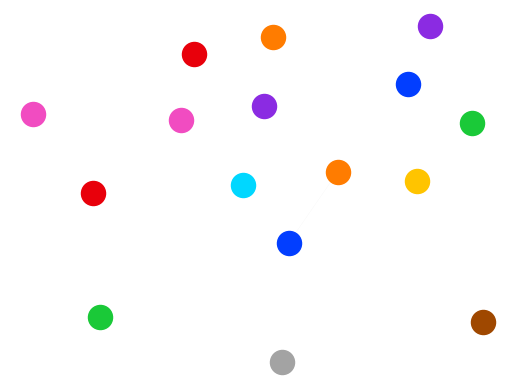

In [43]:
# Prepare IDs this could for example be the combination of patient ID and tissue type. Apart from that, the function assigns a number to each name from the neighborhood column
cells_df = prepare_neighborhood_df(cells_df, neighborhood_column = neighborhood_col, patient_ID_component1 = ID_component1, patient_ID_component2 = ID_component2) # this is a helper function 


# devide IDs/patients into groups
patient_to_group_dict = cells_df.loc[:,['patients',ID_component2]].drop_duplicates().set_index('patients').to_dict()[ID_component2]
group1_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=="Biopsy"]
group2_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=='Resection']

# Provide user feedback
print(group1_patients)

# select which neighborhoods and functional subsets
cns = list(cells_df['neigh_num'].unique())
subsets = ['CD4+ T cell']

#log (1e-3 +  neighborhood specific cell type frequency) of functional subsets) ('nsctf')
nsctf = np.log(1e-3 + cells_df.groupby(['patients','neigh_num'])[subsets].mean().reset_index().set_index(['neigh_num','patients']))

cca = CCA(n_components=1,max_iter = 5000)
func = pearsonr

# set number of permutation params
n_perms = 5000


# Run CCA
stats_group1 = Perform_CCA(cca, n_perms, nsctf, cns, subsets, group = group1_patients)

Visulize_CCA_results(CCA_results = stats_group1, save_fig = False, save_path = output_dir, save_name = "CCA_vis.png")

# Run CCA for group 2
stats_group2 = Perform_CCA(cca, n_perms, nsctf, cns, subsets, group = group2_patients)

Visulize_CCA_results(CCA_results = stats_group2, save_fig = False, save_path = output_dir, save_name = "CCA_vis.png")

In [44]:
atrs

{(0, 1): 0.3238,
 (0, 3): 0.336,
 (0, 6): 0.662,
 (0, 8): 0.3392,
 (0, 10): 0.3322,
 (0, 12): 0.3242,
 (0, 16): 0.3264,
 (1, 6): 0.1712,
 (1, 4): 0.6594,
 (1, 8): 0.8326,
 (1, 9): 0.334,
 (1, 10): 0.8226,
 (1, 11): 0.3332,
 (1, 12): 0.8368,
 (1, 13): 0.666,
 (1, 14): 0.6628,
 (3, 4): 0.336,
 (3, 6): 0.5006,
 (3, 9): 0.6658,
 (3, 11): 0.6672,
 (3, 13): 0.3296,
 (3, 16): 0.8344,
 (4, 9): 0.6694,
 (4, 8): 0.6664,
 (4, 10): 0.68,
 (4, 11): 0.6648,
 (4, 12): 0.4848,
 (4, 13): 0.8354,
 (4, 14): 0.6832,
 (4, 16): 0.1674,
 (6, 8): 0.1654,
 (6, 9): 0.3254,
 (6, 10): 0.1632,
 (6, 11): 0.34,
 (6, 12): 0.1646,
 (6, 16): 0.6672,
 (8, 9): 0.3326,
 (8, 10): 0.8348,
 (8, 11): 0.3326,
 (8, 12): 0.8312,
 (8, 13): 0.6664,
 (8, 14): 0.6708,
 (9, 10): 0.3306,
 (9, 11): 0.8354,
 (9, 12): 0.34,
 (9, 13): 0.6754,
 (9, 14): 0.343,
 (9, 16): 0.5104,
 (10, 11): 0.3342,
 (10, 12): 0.8292,
 (10, 13): 0.6658,
 (10, 14): 0.6584,
 (12, 11): 0.3302,
 (12, 13): 0.4994,
 (12, 14): 0.6794,
 (16, 11): 0.4998,
 (16, 13): 0

## 4.4) Tensor decomposition

In [ ]:
# Prepare IDs this could for example be the combination of patient ID and tissue type. Apart from that, the function assigns a number to each name from the neighborhood column
cells_df = prepare_neighborhood_df(cells_df, neighborhood_column = neighborhood_col, patient_ID_component1 = ID_component1, patient_ID_component2 = ID_component2) # this is a helper function 

# devide IDs/patients into groups
patient_to_group_dict = cells_df.loc[:,['patients',ID_component2]].drop_duplicates().set_index('patients').to_dict()[ID_component2]
group1_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=="Biopsy"]
group2_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=='Resection']

# Provide user feedback
print(group1_patients)

list(cells_df['Coarse Cell'].unique())
list(cells_df['neigh_num'].unique())

# select the cts
cts = list(cells_df['Coarse Cell'].unique()) # In theory you could select all cell types 
#cts =['Macrophage CD169+',   # It is very likely that a user wants to select specific cell types 
# 'CD4+ T cell',
# 'DC',
# 'Stromal',
#  'Tumor Ki67+',
#  'Tumor PDL1+ MHCI+',
#  'Tumor',
# 'Macrophage',
# 'Neutrophil',
# 'NK',
# 'CD8+ T cell PD1+',
# 'CD8+ T cell',
# 'CD4+ Treg',
# 'B cell']

# select the cns
cns = list(cells_df['neigh_num'].unique())
#cns = [0, 1, 2, 3, 4, 5, 6]

###

# Build the tensors for each patient group
counts = cells_df.groupby(['patients','neigh_num','Coarse Cell']).size()

#initialize the tensors

dat1 = build_tensors(df = cells_df, group = group1_patients, cns = cns, cts = cts)
dat2 = build_tensors(df = cells_df, group = group2_patients, cns = cns, cts = cts)

###

# The following tries different numbers of CN modules/CT modules to determine suitable rank for decomposition

evaluate_ranks(dat1,2)
plt.show()
evaluate_ranks(dat2,2)
plt.show()

plot_modules_heatmap(dat1, cns, cts)
plot_modules_heatmap(dat2, cns, cts)

# Set a save path MOVE THIS TO TOP OF SCIPT COMBINE WITH OUTPUT 
save_path = '/Users/timnoahkempchen/Downloads/'

pal = sns.color_palette('bright',30) # Choose some random colors to demonstrate that function in working 
plot_modules_graphical(dat1, pal = pal, cns = cns, cts = cts, save_name = 'T cell', save_path = output_dir)

# 5) Analysis dependent on community analysis 

## 5.1) Specify additional information

In [ ]:
col_list = cells_df2.columns

# Spatial context 
n_num = 75
ks=[n_num]
cluster_col = 'community'
sum_cols=cells_df2[cluster_col].unique()
keep_cols = col_list
X='x'
Y='y'
Reg = 'unique_region'
Neigh = Neighborhoods(cells_df2,ks,cluster_col,sum_cols,keep_cols,X,Y,reg=Reg,add_dummies=True)
windows = Neigh.k_windows()
Reg = "unique_region"

#Choose the windows size to continue with
w = windows[n_num]

n_neighborhoods=7
n2_name = 'neigh_ofneigh'
k_centroids = {}

km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)
labels = km.fit_predict(w[sum_cols].values)
k_centroids[n_num] = km.cluster_centers_
w[n2_name] = labels

## Spatial context analysis 

In [ ]:
windows, sum_cols = Create_neighborhoods(df = cells_df,
                     n_num = n_num,
                     cluster_col = 'community',
                     X = 'x',
                     Y = 'y',
                     reg = "unique_region",
                     sum_cols = None,
                     keep_cols = None,
                     ks = [n_num])

w, k_centroids = Chose_window_size(windows,
                      n_num = n_num,
                      n_neighborhoods = 10,
                      n2_name = 'neigh_ofneigh', sum_cols = sum_cols)

Niche_heatmap(k_centroids, w, n_num, sum_cols)


names = cells_df2[cluster_col].unique()
colors = generate_random_colors(n = len(names))

color_dic = assign_colors(names, colors)

pal_color=color_dic
l=list(pal_color.keys())



plot_list = list_n = [ 'Atrophic Cardiac Enriched', "Inflamed Stroma", 'Inflamed CK7hi Epithelial']

In [ ]:
Barycentric_coordinate_projection(w, 
                                      plot_list = plot_list, 
                                      threshold = 10, 
                                      output_dir = output_dir, 
                                      save_name = save_name, 
                                      col_dic = color_dic,
                                      l = l,
                                      cluster_col = cluster_col,
                                      n_num = n_num,
                                      SMALL_SIZE = 14, 
                                      MEDIUM_SIZE = 16, 
                                      BIGGER_SIZE = 18)

In [ ]:
simps, simp_freqs, simp_sums = calculate_neigh_combs(w, 
                                                     l,
                                                     n_num, 
                                                     threshold = 0.85, 
                                                     per_keep_thres = 0.85)

g, tops, e0, e1 = build_graph_CN_comb_map(simp_freqs)

generate_CN_comb_map(graph = g, 
                     tops = tops, 
                     e0 = e0, 
                     e1 = e1, 
                     l = l,
                     simp_freqs = simp_freqs,
                     color_dic = color_dic)

In [ ]:
get_network(ttl_per_thres=0.9,
            comb_per_thres=0.005,
            neigh_sub = plot_list,
            save_name='All_comm',
            save_path = output_dir,
            sub_col = cluster_col, 
            color_dic = color_dic,
            windows = windows,
            n_num = n_num,
            l = l)

### Statistics

In [ ]:
simp_df_tissue1, simp_df_tissue2 = spatial_context_stats(windows, n_num, total_per_thres = 0.9, \
                      comb_per_thres = 0.005, \
                      tissue_column = 'Block type',\
                      subset_list = ["Resection"],\
                      plot_order = ['Resection','Biopsy'],\
                      pal_tis = {'Resection':'blue','Biopsy':'orange'},\
                      patient_ID_component1 = ID_component1, \
                      patient_ID_component2 = ID_component2,\
                      subset_list_tissue1 = ["Resection"],\
                      subset_list_tissue2 = ["Biopsy"])
    
print(simp_df_tissue1["combination"].values)  
print(simp_df_tissue2["combination"].values)     
     
simp_df_tissue1 = simp_df_tissue1.set_index("combination")
simp_df_tissue2 = simp_df_tissue2.set_index("combination")
    
spatial_context_stats_vis(neigh_comb = (9,),
                              simp_df_tissue1 = simp_df_tissue1,
                              simp_df_tissue2 = simp_df_tissue2,
                              pal_tis = {'Resection': 'blue', 'Biopsy': 'orange'},
                              plot_order = ['Resection', 'Biopsy'])